In [1]:
#notebook to analyze the Sag River Discharge fits
#by Mike, January 29, 2021

In [2]:
# 1) add FLaPE-Byrd repository location (pulled from github.com/mikedurand/flape-byrd) to the path
import sys
sys.path.append('/Users/mtd/GitHub/FLaPE-Byrd/') 

In [3]:
# 2) import needed modules
from ReachObservations import ReachObservations
from ReachTruth import ReachTruth
from RiverIO import RiverIO
from FlowLawCalibration import FlowLawCalibration
from Domain import Domain
from pprint import pprint
from FlowLaws import MWACN,MWAPN

In [4]:
# 3) provide path to reach averaged Sag data, and read data in
BaseDir='PepsiSac/'
IO=RiverIO('MetroManTxt',obsFname=BaseDir+'SWOTobs.txt',truthFname=BaseDir+'truth.txt')

In [5]:
# 4) Set up data objects
D=Domain(IO.ObsData)
Obs=ReachObservations(D,IO.ObsData)
Truth=ReachTruth(IO.TruthData)

In [6]:
# 5) Specify which flow law variants to run
Variants=[1, 2]

In [7]:
# 6) For each reach (usually just one for ArcticDEM) and for each flow law variant, do the calibration calculations
Variants=['Constant-n', 'PowerLaw-n']


ReachData={} #stash reach data in a dictionary
for r in range(0,D.nR):
    dA=Obs.dA[r,:]
    W=Obs.w[r,:]
    S=Obs.S[r,:]
    Qtrue=Truth.Q[r,:]
    ReachData[r]=[dA,W,S,Qtrue]

cals={}
for r in range(0,D.nR):    
    FlowLawVariants={} #stash flow law variant objects for each reach in a dict       
    if 'Constant-n' in Variants:     
        FlowLawVariants['Constant-n']=MWACN(ReachData[r][0],ReachData[r][1],ReachData[r][2])
        
    if 'PowerLaw-n' in Variants:
        FlowLawVariants['PowerLaw-n']=MWAPN(ReachData[r][0],ReachData[r][1],ReachData[r][2])
       
    cal=[]
    for variant in FlowLawVariants.keys():               
        flow_law_cal=FlowLawCalibration(D,ReachData[r][3],FlowLawVariants[variant])
        flow_law_cal.CalibrateReach()
        cal.append(flow_law_cal)        
    
    cals[r]=cal

/Users/mtd/GitHub/FLaPE-Byrd/FlowLaws.py:45: RuntimeWarning: overflow encountered in power
  n=params[0]*((params[1]+self.dA)/self.W)**params[2]
/Users/mtd/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


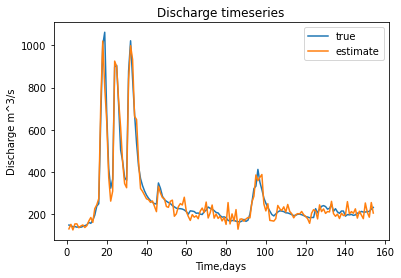

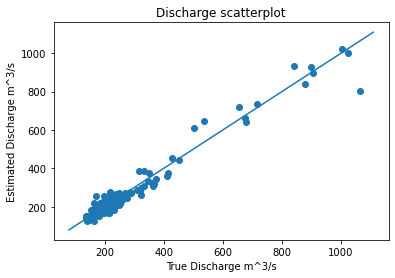

In [8]:
# 7 Visualize results: timeseries and scatterplot
cals[0][1].PlotTimeseries()
cals[0][1].PlotScatterplot()

In [9]:
# 8 Error metrics
cals[0][1].Performance.ShowKeyErrorMetrics()

Normalized RMSE: 0.14
Normalized NSE: 0.96
